In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [56]:
dataset = pd.read_csv(r"C:\Users\sapta\Desktop\practice\datasets\Tomato.csv")
series = dataset["Average"][500:1500]
series = series.interpolate(method = "linear")

orseries = dataset["Average"][1500:1525]
orseries

1500    55.0
1501    47.5
1502    47.5
1503    52.5
1504    57.5
1505    62.5
1506    55.0
1507    57.5
1508    67.5
1509    62.5
1510    52.5
1511    57.5
1512    57.5
1513    57.5
1514    65.0
1515    72.5
1516    82.5
1517    72.5
1518    77.5
1519    77.5
1520    67.5
1521    67.5
1522    67.5
1523    57.5
1524    47.5
Name: Average, dtype: float64

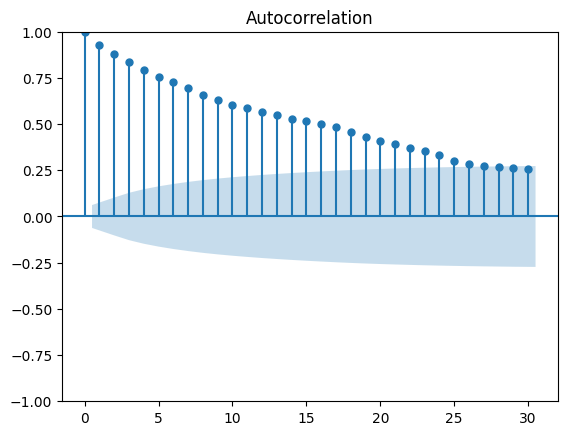

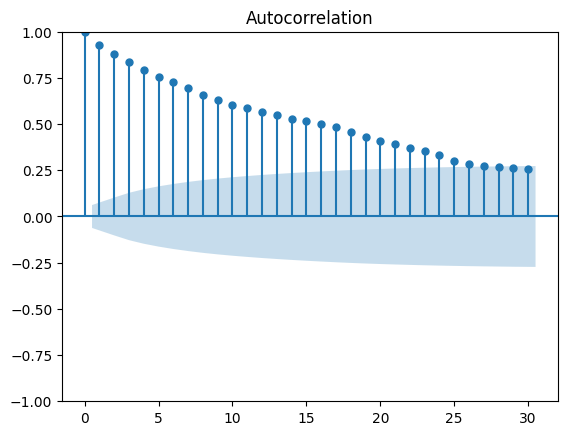

In [43]:
plot_acf(series, lags = 30)


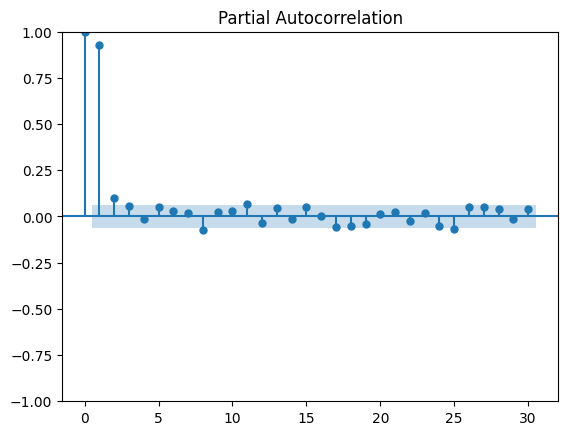

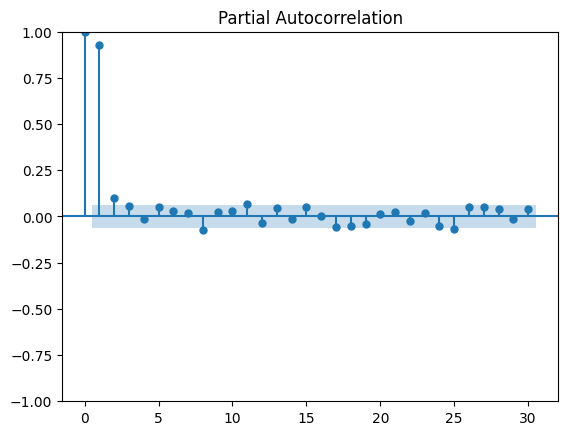

In [44]:
plot_pacf(series, lags = 30)

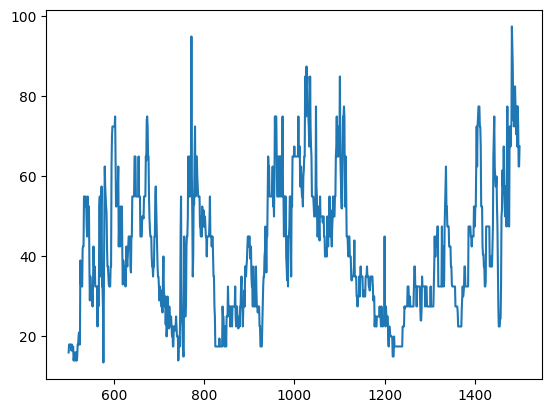

In [45]:
plt.figure()
plt.plot(series)
plt.show()

In [47]:
models30 = SARIMAX(series, order = (1,0,2), seasonal_order= (1,0,2,30) )
models30_fit = models30.fit()

print(models30_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Average   No. Observations:                 1000
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 30)   Log Likelihood               -3219.063
Date:                            Tue, 17 Feb 2026   AIC                           6452.126
Time:                                    12:21:38   BIC                           6486.480
Sample:                                         0   HQIC                          6465.183
                                           - 1000                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9934      0.004    281.365      0.000       0.986       1.000
ma.L1         -0.1432      0.023   

In [48]:
models7 = SARIMAX(series, order= (1,0,2), seasonal_order=(1,0,2,7))
models7_fit = models7.fit()

print(models7_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           Average   No. Observations:                 1000
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 7)   Log Likelihood               -3216.266
Date:                           Tue, 17 Feb 2026   AIC                           6446.532
Time:                                   12:23:33   BIC                           6480.886
Sample:                                        0   HQIC                          6459.589
                                          - 1000                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9747      0.008    120.893      0.000       0.959       0.991
ma.L1         -0.1217      0.024     -5.031

c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
model_arima = ARIMA(series, order=(1,0,2))
model_arima_fit = model_arima.fit()

model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Average   No. Observations:                 1000
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -3210.871
Date:                Tue, 17 Feb 2026   AIC                           6431.741
Time:                        12:25:17   BIC                           6456.280
Sample:                             0   HQIC                          6441.068
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4197      3.883     10.667      0.000      33.809      49.030
ar.L1          0.9555      0.010     93.241      0.000       0.935       0.976
ma.L1         -0.1214      0.024     -5.167      0.000      -0.168      -0.075
ma.L2         -0.0601      0.026     -2.306      0.021      -0.111      -0.009
sigma2        35.9376      1.001     35.899      0.000      33.976      37.900
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               828.05
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
forecast30 = models30_fit.forecast(steps = 25)
forecast7 = models7_fit.forecast(steps = 25)
forecast_arima = model_arima_fit.forecast(steps= 25)

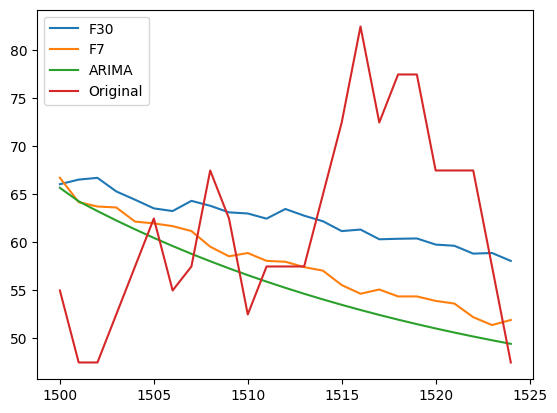

In [57]:
plt.figure()
plt.plot(forecast30, label = "F30")
plt.plot(forecast7, label = "F7")
plt.plot(forecast_arima, label = "ARIMA")
plt.plot(orseries, label = "Original")

plt.legend()
plt.show()